In [ ]:
!pip install visualkeras

In [ ]:
#importing libraries

from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import cv2
import os
import PIL
import numpy as np
import pathlib
import glob
import visualkeras
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#assigning directory
directory=pathlib.Path("/content/drive/MyDrive/brain net")

# Brain net

In [ ]:
# Just needed in case you'd like to append it to an array
data = []

for filename in os.listdir("."):
    if filename.endswith("jpg"):
        # Your code comes here such as
        print(filename)
        data.append(filename)

In [ ]:
#count of images in the directory given
image_count=len(list(directory.glob('*/*.jpg')))
#print(list(directory.glob('/*.jpg')))
image_count

2870

In [ ]:
#creating dictionary of flower species
flower_images_dict={
    "glioma":list(directory.glob('glioma_tumor/*.jpg')),
    "meningioma":list(directory.glob('meningioma_tumor/*.jpg')),
    "no":list(directory.glob('no_tumor/*.jpg')),
    "pituitary":list(directory.glob('pituitary_tumor/*.jpg'))
}

In [ ]:
flower_images_dict

{'glioma': [PosixPath('/content/drive/MyDrive/brain net/glioma_tumor/gg (454).jpg'),
  PosixPath('/content/drive/MyDrive/brain net/glioma_tumor/gg (410).jpg'),
  PosixPath('/content/drive/MyDrive/brain net/glioma_tumor/gg (433).jpg'),
  PosixPath('/content/drive/MyDrive/brain net/glioma_tumor/gg (411).jpg'),
  PosixPath('/content/drive/MyDrive/brain net/glioma_tumor/gg (451).jpg'),
  PosixPath('/content/drive/MyDrive/brain net/glioma_tumor/gg (380).jpg'),
  PosixPath('/content/drive/MyDrive/brain net/glioma_tumor/gg (475).jpg'),
  PosixPath('/content/drive/MyDrive/brain net/glioma_tumor/gg (41).jpg'),
  PosixPath('/content/drive/MyDrive/brain net/glioma_tumor/gg (439).jpg'),
  PosixPath('/content/drive/MyDrive/brain net/glioma_tumor/gg (460).jpg'),
  PosixPath('/content/drive/MyDrive/brain net/glioma_tumor/gg (424).jpg'),
  PosixPath('/content/drive/MyDrive/brain net/glioma_tumor/gg (429).jpg'),
  PosixPath('/content/drive/MyDrive/brain net/glioma_tumor/gg (418).jpg'),
  PosixPath('/co

In [ ]:
#Different species list
keys=["glioma","meningioma","no","pituitary"]

In [ ]:
#resizing and creating labels using computer vision
resized,labels=[],[]
for flower_name,images in flower_images_dict.items():
    for image in images:
        #print("completed")
        img=cv2.imread(str(image))
        resized_image=cv2.resize(img,(224,224))
        resized.append(resized_image)
        labels.append(keys.index(flower_name))
flower_images_dict

{'glioma': [PosixPath('/content/drive/MyDrive/brain net/glioma_tumor/gg (454).jpg'),
  PosixPath('/content/drive/MyDrive/brain net/glioma_tumor/gg (410).jpg'),
  PosixPath('/content/drive/MyDrive/brain net/glioma_tumor/gg (433).jpg'),
  PosixPath('/content/drive/MyDrive/brain net/glioma_tumor/gg (411).jpg'),
  PosixPath('/content/drive/MyDrive/brain net/glioma_tumor/gg (451).jpg'),
  PosixPath('/content/drive/MyDrive/brain net/glioma_tumor/gg (380).jpg'),
  PosixPath('/content/drive/MyDrive/brain net/glioma_tumor/gg (475).jpg'),
  PosixPath('/content/drive/MyDrive/brain net/glioma_tumor/gg (41).jpg'),
  PosixPath('/content/drive/MyDrive/brain net/glioma_tumor/gg (439).jpg'),
  PosixPath('/content/drive/MyDrive/brain net/glioma_tumor/gg (460).jpg'),
  PosixPath('/content/drive/MyDrive/brain net/glioma_tumor/gg (424).jpg'),
  PosixPath('/content/drive/MyDrive/brain net/glioma_tumor/gg (429).jpg'),
  PosixPath('/content/drive/MyDrive/brain net/glioma_tumor/gg (418).jpg'),
  PosixPath('/co

In [ ]:
#function to print images
def print_image(i,j):
    plt.imshow(i)
    plt.title(keys[j])

In [ ]:
!pip install scikit-learn
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
#splitting data into train and test
#if any integer is given to random_state it will generate and give same set of data each time we run the code and if we give
#None different sequences will be generated
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(resized,labels,test_size=0.25,random_state=0)

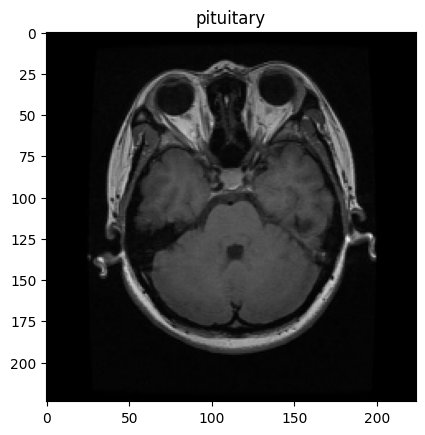

In [ ]:
print_image(x_train[15],y_train[15])

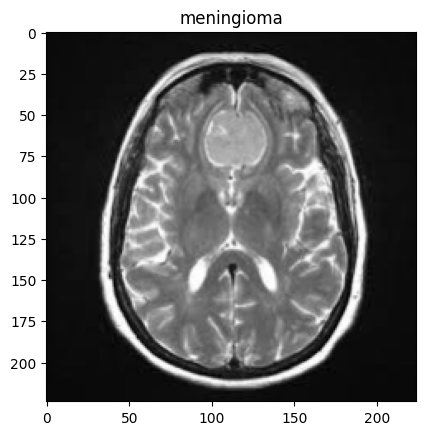

In [ ]:
print_image(x_test[6],y_test[6])

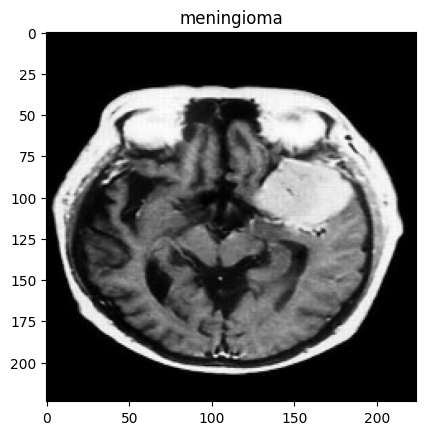

In [ ]:
print_image(x_test[60],y_test[60])

In [ ]:
#normalizing data
x_train_scaled=np.array(x_train)/255
x_test_scaled=np.array(x_test)/255

In [ ]:
x_train_scaled.shape

(2152, 224, 224, 3)

In [ ]:
y_train=np.array(y_train)
y_train.shape

(2152,)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

myCNN7_4 = tf.keras.models.Sequential([
    layers.BatchNormalization(),
    layers.Conv2D(32, 3, activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation="relu"),
    layers.MaxPooling2D(),
    # Add more layers as needed
])

# 7.4 RMSprop optimizer

In [ ]:
myCNN7_4=tf.keras.models.Sequential([
    layers.BatchNormalization(),
    layers.Conv2D(32,3,activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(128,3,activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256,activation="relu"),
    layers.Dense(4,activation="softmax")
])
myCNN7_4.compile(optimizer="RMSprop",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
def custom_callback(epoch, logs):

    print(f"Epoch: {epoch}, Loss: {logs['loss']}")


In [ ]:
myCNN7_4.evaluate(x_test_scaled,np.array(y_test))

23/23 [==============================] - 1s 22ms/step - loss: 1.3844 - accuracy: 0.2869


[1.3843883275985718, 0.2869080901145935]

Epoch 1/100
68/68 [==============================] - 9s 70ms/step - loss: 2.6495 - accuracy: 0.5572
Epoch 2/100
68/68 [==============================] - 4s 57ms/step - loss: 0.6801 - accuracy: 0.7272
Epoch 3/100
68/68 [==============================] - 4s 56ms/step - loss: 0.4290 - accuracy: 0.8350
Epoch 4/100
68/68 [==============================] - 4s 58ms/step - loss: 0.2339 - accuracy: 0.9164
Epoch 5/100
68/68 [==============================] - 4s 58ms/step - loss: 0.1283 - accuracy: 0.9461
Epoch 6/100
68/68 [==============================] - 4s 56ms/step - loss: 0.0678 - accuracy: 0.9730
Epoch 7/100
68/68 [==============================] - 4s 57ms/step - loss: 0.0975 - accuracy: 0.9837
Epoch 8/100
68/68 [==============================] - 4s 59ms/step - loss: 0.0252 - accuracy: 0.9898
Epoch 9/100
68/68 [==============================] - 4s 59ms/step - loss: 0.0500 - accuracy: 0.9865
Epoch 10/100
68/68 [==============================] - 4s 57ms/step - loss: 0.0149 - accuracy: 0.9930

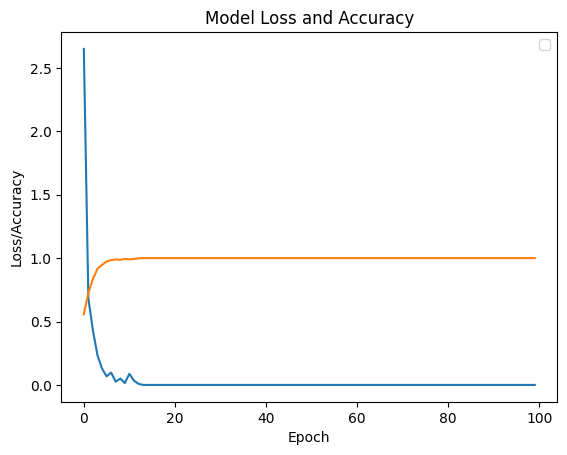

In [ ]:

history = myCNN7_4.fit(x_train_scaled, np.array(y_train), epochs=100)  # Train the model

plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model Loss and Accuracy')  # More descriptive title
plt.ylabel('Loss/Accuracy')  # Combined label for both plots
plt.xlabel('Epoch')  # Label for x-axis
plt.legend()  # Show labels for each line in the plot
plt.show()


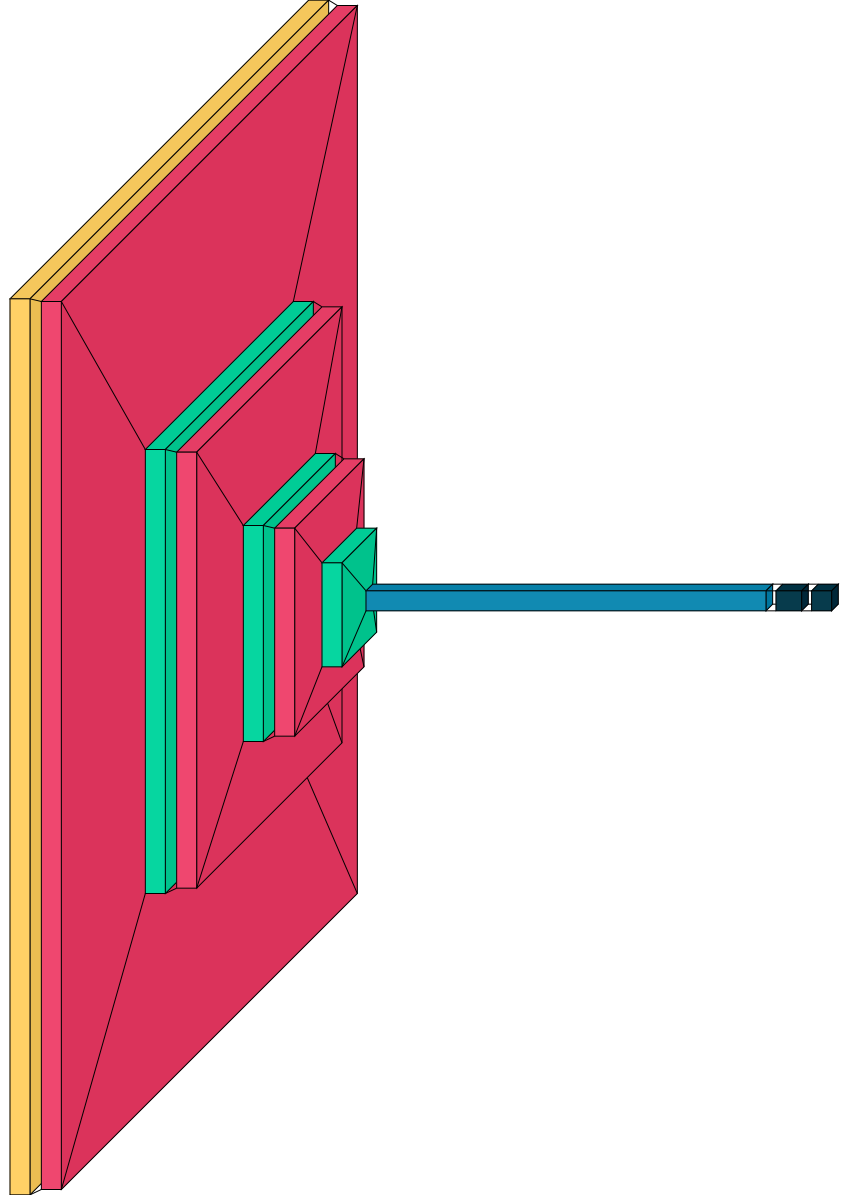

In [ ]:
visualkeras.layered_view(myCNN7_4)